In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sys
import localSettings as ls
import math
print(ls.main_path)
import load_data_run123
import plotter_alex
import importlib
importlib.reload(plotter_alex)
import uproot
import matplotlib.pylab as pylab
import numpy as np
import math
from sklearn.model_selection import train_test_split
import pickle
import xgboost as xgb
import nue_booster 
importlib.reload(nue_booster)
import awkward
from matplotlib import gridspec
from collections import defaultdict

/home/alex/NuMI/PELEE/


In [2]:
ending = "Dec19"

##  Energy

## Closure Tests

## Blockwise Unfolding

In [3]:

with open('../blockwise/stv-analysis-new/blockwise_unsmeared_events_energy_MC_ONLY_weighted_recoCut_incErr_'+ending+'.csv') as file:
    content = file.readlines()
events = content[0:]
    
for i in range(16):
    events[i]=events[i].rstrip().rstrip(',')
    events[i] = float(events[i])
    
print("Unsmeared events")
print(events)
print("")

#------------------------------------------------------------------------------
with open('../blockwise/stv-analysis-new/blockwise_unsmeared_AC_energy_MC_ONLY_weighted_recoCut_incErr_'+ending+'.csv') as file:
    content = file.readlines()
AC = content[0:]
    
for i in range(256):
    AC[i]=AC[i].rstrip().rstrip(',')
    AC[i] = float(AC[i])
    

chunks = [AC[x:x+16] for x in range(0, len(AC), 16)]

print("AC")
print(chunks)
print("")
#---------------------------------------------------------------

with open('nue_full_500_catsel_nopions_recoE_usingSelection_prior_true_signal_blockwise_recoCut_comb_'+ending+'.csv') as file:
    content = file.readlines()
prior_true = content[0:]
    
for i in range(16):
    prior_true[i]=prior_true[i].rstrip().rstrip(',')
    prior_true[i] = float(prior_true[i])
    
print("Prior Truth: ")
print(prior_true)
print("")

#----------------------------------------------------------------
with open('../blockwise/stv-analysis-new/blockwise_unsmeared_errors_energy_MC_ONLY_weighted_recoCut_incErr_'+ending+'.csv') as file:
    content = file.readlines()
errs = content[0:]
    
for i in range(16):
    errs[i]=errs[i].rstrip().rstrip(',')
    errs[i] = float(errs[i])
    
print("Errors: ")
print(errs)
print("")
print("################################################################")
print("")

#----------------------------------------------------------------
with open('../blockwise/stv-analysis-new/blockwise_unsmeared_cov_matrix_energy_MC_ONLY_weighted_recoCut_incErr_'+ending+'.csv') as file:
    content = file.readlines()
cov = content[0:]
    
for i in range(256):
    cov[i]=cov[i].rstrip().rstrip(',')
    cov[i] = float(cov[i])
    

chunks_cov = [cov[x:x+16] for x in range(0, len(cov), 16)]

print("cov")
print(chunks_cov)
print("")


Unsmeared events
[24.2299, 156.376, 235.263, 241.567, 190.085, 58.5175, 64.1559, 148.941, 1140.61, 5342.03, 3857.67, 3484.63, 1790.65, 1973.51, 817.848, 109.766]

AC
[[0.00289793, 0.0187027, 0.0281378, 0.0288962, 0.0228038, 0.00726, 0.00282161, 0.00570293, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0187027, 0.120704, 0.181596, 0.186491, 0.147172, 0.0468548, 0.0182102, 0.0368057, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0281378, 0.181596, 0.273207, 0.280571, 0.221416, 0.0704918, 0.0273967, 0.0553733, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0288962, 0.186491, 0.280571, 0.288554, 0.231621, 0.0714874, 0.0275641, 0.0530702, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0228038, 0.147172, 0.221416, 0.231621, 0.222178, 0.0491105, 0.0159692, 0.00501324, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.00726, 0.0468548, 0.0704918, 0.0714874, 0.0491105, 0.0448039, 0.00316908, -0.00345642, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.00282161, 0.0182102, 0.0273967, 0.0275641, 0.0159692, 0.0031690

In [4]:
with open('../blockwise/stv-analysis-new/blocks_16.txt') as file:
    content = file.readlines()
blocks = content[0:]

print(blocks)

['16\n', '0  0\n', '1  0\n', '2  0\n', '3  0\n', '4  0\n', '5  0\n', '6  0\n', '7  0\n', '8  1\n', '9  1\n', '10 1\n', '11 1\n', '12 1\n', '13 1\n', '14 1\n', '15 1\n', '16\n', '0  0\n', '1  0\n', '2  0\n', '3  0\n', '4  0\n', '5  0\n', '6  0\n', '7  0\n', '8  1\n', '9  1\n', '10 1\n', '11 1\n', '12 1\n', '13 1\n', '14 1\n', '15 1\n']


In [5]:

made_data_sig = np.dot(prior_true, chunks)
print("Prior_Truth x AC: ")
print(made_data_sig)
print("")
print("")
print("Unfolding Done with MC Data Signal: ")
print(events)
print("")

diff = made_data_sig - events
print("")
print("Difference")
print(diff)

#for i in made_data_sig:
#    print(i)

print("")
diffasfrac = np.nan_to_num(diff/made_data_sig)
print(diffasfrac*100)

Prior_Truth x AC: 
[  24.23004222  156.37638188  235.2643134   241.5680165   190.08578806
   58.51780369   64.15658621  148.94338744 1140.60595489 5342.03221209
 3857.66363875 3484.62933564 1790.64437078 1973.51419649  817.84826157
  109.76618454]


Unfolding Done with MC Data Signal: 
[24.2299, 156.376, 235.263, 241.567, 190.085, 58.5175, 64.1559, 148.941, 1140.61, 5342.03, 3857.67, 3484.63, 1790.65, 1973.51, 817.848, 109.766]


Difference
[ 0.00014222  0.00038188  0.0013134   0.0010165   0.00078806  0.00030369
  0.00068621  0.00238744 -0.00404511  0.00221209 -0.00636125 -0.00066436
 -0.00562922  0.00419649  0.00026157  0.00018454]

[ 5.86955670e-04  2.44203879e-04  5.58264106e-04  4.20792032e-04
  4.14581043e-04  5.18967920e-04  1.06958268e-03  1.60291539e-03
 -3.54646101e-04  4.14092085e-05 -1.64899069e-04 -1.90654442e-05
 -3.14368552e-04  2.12640253e-04  3.19830884e-05  1.68120777e-04]


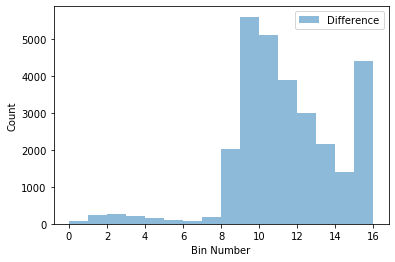

In [11]:
pyplot.hist(count, bins, weights=prior_true, alpha=0.5, label='Difference')
pyplot.legend(loc='upper right')
pyplot.xlabel("Bin Number")
pyplot.ylabel("Count")
pyplot.show()

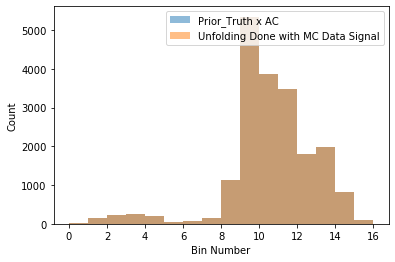

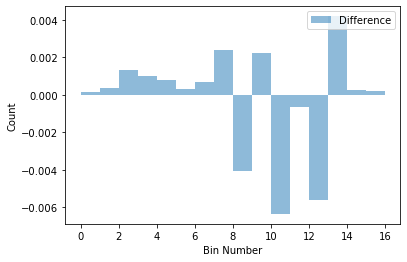

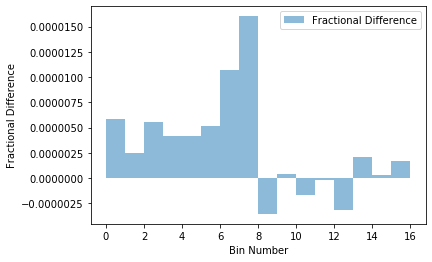

In [12]:
import random
import numpy
from matplotlib import pyplot

bins = np.arange(0, 17, 1)
count = np.arange(0.0, 16.0, 1)

pyplot.hist(count, bins, weights=made_data_sig, alpha=0.5, label='Prior_Truth x AC')
pyplot.hist(count, bins, weights=events, alpha=0.5, label='Unfolding Done with MC Data Signal')
pyplot.legend(loc='upper right')
pyplot.xlabel("Bin Number")
pyplot.ylabel("Count")
pyplot.show()

pyplot.hist(count, bins, weights=diff, alpha=0.5, label='Difference')
pyplot.legend(loc='upper right')
pyplot.xlabel("Bin Number")
pyplot.ylabel("Count")
pyplot.show()


pyplot.hist(count, bins, weights=diffasfrac, alpha=0.5, label='Fractional Difference')
pyplot.legend(loc='upper right')
pyplot.xlabel("Bin Number")
pyplot.ylabel("Fractional Difference")
pyplot.show()

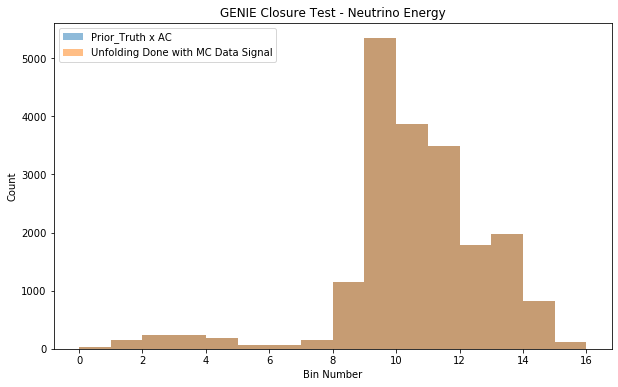

In [13]:
fig = plt.figure(figsize=(10, 6))

pyplot.hist(count, bins, weights=made_data_sig, alpha=0.5, label='Prior_Truth x AC')
pyplot.hist(count, bins, weights=events, alpha=0.5, label='Unfolding Done with MC Data Signal')
pyplot.legend(loc='upper left')
pyplot.xlabel("Bin Number")
pyplot.ylabel("Count")
pyplot.title("GENIE Closure Test - Neutrino Energy")
pyplot.show()

fig.savefig("GENIE_closure_test_"+ending+".svg",bbox_inches='tight' )

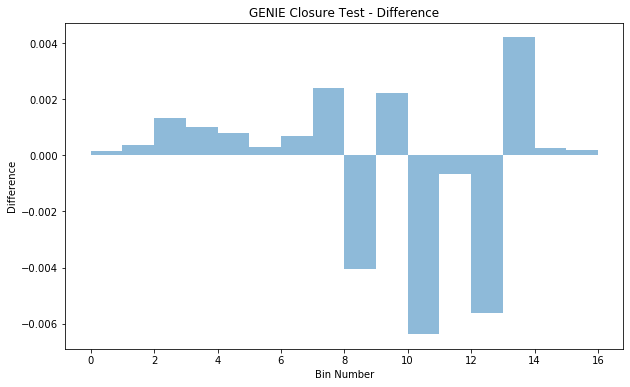

In [14]:
fig = plt.figure(figsize=(10, 6))

pyplot.hist(count, bins, weights=diff, alpha=0.5)
#pyplot.legend(loc='upper right')
pyplot.xlabel("Bin Number")
pyplot.ylabel("Difference")
pyplot.title("GENIE Closure Test - Difference")
pyplot.show()

fig.savefig("GENIE_closure_test_diff_"+ending+".svg",bbox_inches='tight' )

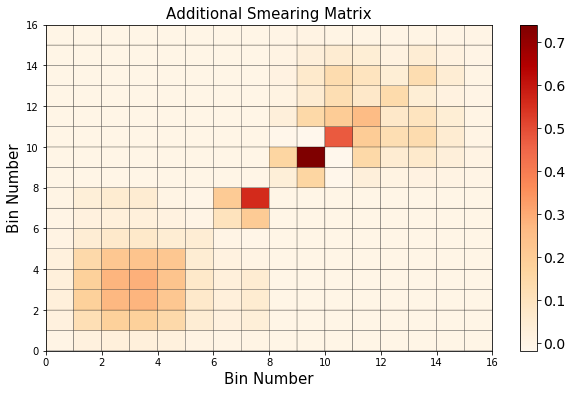

In [15]:
fig = plt.figure(figsize=(10, 6))  
    
plt.pcolor(bins, bins, chunks, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
#cbar.set_label(r"Log (Power)", size=15)

plt.xlabel('Bin Number', fontsize=15)
plt.ylabel('Bin Number', fontsize=15)

plt.title('Additional Smearing Matrix', fontsize=15)

plt.show()

fig.savefig("GENIE_closure_test_Ac_"+ending+".svg",bbox_inches='tight' )

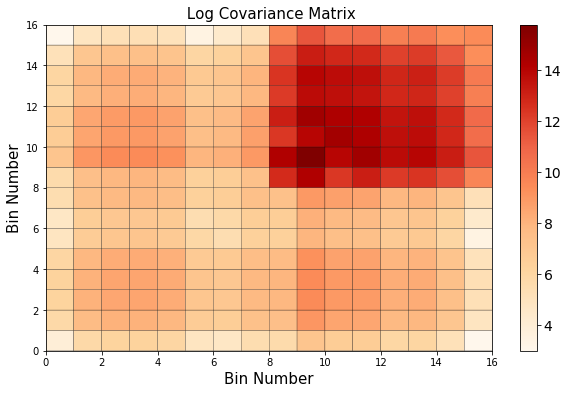

In [16]:
fig = plt.figure(figsize=(10, 6))  

#print(bins)
bins = np.arange(0, 17, 1)
count = np.arange(0.0, 16.0, 1)
    
plt.pcolor(bins, bins, np.log(chunks_cov), cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
#cbar.set_label(r"Log (Power)", size=15)

plt.xlabel('Bin Number', fontsize=15)
plt.ylabel('Bin Number', fontsize=15)

plt.title(' Log Covariance Matrix', fontsize=15)

plt.show()

## Need to convert to xsec units

xsec = unfolded event counts / (integrated flux * number of argon targets)

In [17]:
###################
### #N argon target calculation
###################

density = 1.3836  #g/cm^3
volume = (246-10)*(106-(-106))*(1026-10)         #cm^3
NA = 6.022E23   #atoms/mol
Nnuc = 40       #nucleans / atom
mmol = 39.95    #g/mol

Narg = (density * volume * NA * Nnuc)/mmol   #nucleons

print("number of argon targets = ", Narg)

number of argon targets =  4.240685683288815e+31


In [18]:
#Need R1 AND R3

####NUE
POT_R1 = 2.0E20 
int_flux_per_POT_R1 = 1.1864530596659353e-11
POT_R3 = 5.014E20
int_flux_per_POT_R3 = 8.628376225834778e-12

int_flux = (int_flux_per_POT_R1*POT_R1) + (int_flux_per_POT_R3*POT_R3)    #cm^-2

print("Nue integrated flux: ", int_flux)

####NUMU

POT_numu_R1 = 2.0E20 
int_flux_per_POT_numu_R1 = 5.455771063338641e-10
POT_numu_R3 = 5.014E20 
int_flux_per_POT_numu_R3 = 3.6729003479115414e-10

int_flux_numu = (int_flux_per_POT_numu_R1*POT_numu_R1) + (int_flux_per_POT_numu_R3*POT_numu_R3)    #cm^-2

print("Numu integrated flux: ", int_flux_numu)

Nue integrated flux:  6699173958.965427
Numu integrated flux:  293274644711.0575


In [19]:
nue_events = np.array(events[0:8])
numu_events = np.array(events[8:16])

nue_errs = np.array(errs[0:8])
numu_errs = np.array(errs[8:16])

In [20]:
#number of events

xsec_nue_events = nue_events / (int_flux * Narg )     
xsec_numu_events = numu_events / (int_flux_numu * Narg )     


#uncertainty

#xsec_nue_errs = nue_errs / (int_flux * Narg )     
#xsec_numu_errs = numu_errs / (int_flux_numu * Narg )     

In [15]:
#Need the four sections of the cov matrix

blockwise_errs = chunks_cov
#print(blockwise_errs)
#print("")

#NUE ONLY
bot_left = blockwise_errs[:8]
for i in range(len(bot_left)):
    bot_left[i] = bot_left[i][:8]
    
nue_errs_bot = np.array(bot_left)/((int_flux*int_flux)*(Narg*Narg))
xsec_nue_errs = (np.sqrt(np.diag(nue_errs_bot)))
    
#MIX
bot_right = blockwise_errs[:8]
for i in range(len(bot_right)):
    bot_right[i] = bot_right[i][8:]
    
mix_errs_bot = np.array(bot_right)/((int_flux*int_flux_numu)*(Narg*Narg))
xsec_botmix_errs = np.nan_to_num(np.sqrt(np.diag(mix_errs_bot)))

    
#MIX
top_left = blockwise_errs[8:]
for i in range(len(top_left)):
    top_left[i] = top_left[i][:8]
    
mix_errs_top = np.array(top_left)/((int_flux*int_flux_numu)*(Narg*Narg))
xsec_topmix_errs = np.nan_to_num(np.sqrt(np.diag(mix_errs_top)))

#NUMU ONLY
top_right = blockwise_errs[8:]
for i in range(len(top_right)):
    top_right[i] = top_right[i][8:]
    
numu_errs_top = np.array(top_right)/((int_flux_numu*int_flux_numu)*(Narg*Narg))
xsec_numu_errs = (np.sqrt(np.diag(numu_errs_top)))


In [16]:
### Calculate ratio uncertainties

xsec_ratio_events = np.nan_to_num(xsec_nue_events/xsec_numu_events)
print("Ratio event counts: ", xsec_ratio_events)
print("")

#####################

ratio_sq = (xsec_nue_events/xsec_numu_events)*(xsec_nue_events/xsec_numu_events)
print("ratio_sq: ", ratio_sq)
print("")
nue_term = (xsec_nue_errs*xsec_nue_errs)/(xsec_nue_events*xsec_nue_events)
print("nue: ", nue_term)
print("")
numu_term = (xsec_numu_errs*xsec_numu_errs)/(xsec_numu_events*xsec_numu_events)
print("numu: ", numu_term)
print("")
mix_1 = (xsec_botmix_errs*xsec_botmix_errs)/(xsec_numu_events*xsec_nue_events)
print("mix: ", mix_1)
print("")
mix_2 = (xsec_topmix_errs*xsec_topmix_errs)/(xsec_numu_events*xsec_nue_events)
print("mix: ", mix_2)
print("")

ratio_var_errs = ratio_sq*(nue_term + numu_term - mix_1 - mix_2)
print(ratio_var_errs)
xsec_ratio_errs = np.nan_to_num(np.sqrt(abs(ratio_var_errs)))
print("Ratio errs: ", xsec_ratio_errs)

Ratio event counts:  [ 0.92996737  1.28149536  2.669819    3.0348288   4.64718971  1.29807473
  3.43413424 59.40181147]

ratio_sq:  [8.64839302e-01 1.64223037e+00 7.12793348e+00 9.21018584e+00
 2.15963722e+01 1.68499800e+00 1.17932780e+01 3.52857521e+03]

nue:  [0.08887151 0.08887088 0.0888715  0.08911857 0.09594737 0.1063015
 0.08023364 0.07753718]

numu:  [0.26481041 0.24411363 0.15365668 0.12743021 0.11894734 0.12508121
 0.1245386  1.03270306]

mix:  [0.01024892 0.01009271 0.00839881 0.00900893 0.00826164 0.00864792
 0.01035003 0.01139598]

mix:  [0.01024892 0.01009271 0.00839881 0.00900893 0.00826164 0.00864792
 0.01035003 0.01139598]

[2.88150683e-01 5.13688161e-01 1.60899245e+00 1.82850675e+00
 4.28410344e+00 3.60735945e-01 2.17081422e+00 3.83714303e+03]
Ratio errs:  [ 0.53679669  0.71672042  1.26846066  1.35222289  2.06980759  0.60061297
  1.47336833 61.94467719]


In [17]:
print(xsec_nue_events)
print("")
print(xsec_numu_events)
print("")
print(xsec_nue_errs)
print("")
print(xsec_numu_errs)

[8.52892474e-41 5.50443516e-40 8.28125755e-40 8.50315834e-40
 6.69099196e-40 2.05981599e-40 2.25828767e-40 5.24272317e-40]

[9.17120864e-41 4.29532195e-40 3.10180486e-40 2.80185767e-40
 1.43979316e-40 1.58682389e-40 6.57600288e-41 8.82586412e-42]

[2.54258543e-41 1.64093927e-40 2.46875243e-40 2.53842523e-40
 2.07255973e-40 6.71580573e-41 6.39672232e-41 1.45986244e-40]

[4.71947942e-41 2.12222649e-40 1.21587855e-40 1.00018946e-40
 4.96566555e-41 5.61209177e-41 2.32067319e-41 8.96901951e-42]


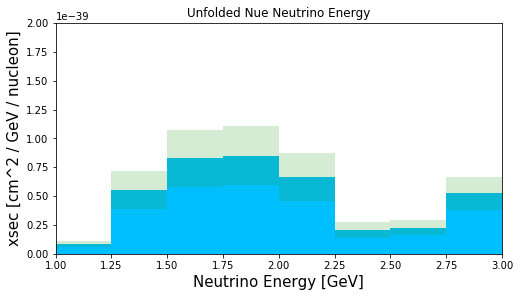

In [21]:
import random
import numpy
from matplotlib import pyplot
"""
bins = np.arange(0, 5.5, 0.5)
count = np.arange(0.1, 5.1, 0.5)
print(count)

plt.ylim(0, 5E-39)

plt.xlabel("Energy [GeV]")
plt.ylabel("xsec [cm^2]")

pyplot.hist(count, bins, weights=xsec_nue_events, alpha=0.5)
#pyplot.legend(loc='upper right')
pyplot.show()
"""

nue_fig = plt.figure(figsize=(8, 7))
nue_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_ax1 = plt.subplot(nue_gs[0])
nue_ax1.set_xlim([1, 3])

bins = np.arange(1, 3.25, 0.25)
bincenters = np.arange(1.125, 3.125, 0.25)
bin_edges = np.arange(1, 3.25, 0.25)
bin_size = [(bin_edges[i + 1] - bin_edges[i]) / 2
            for i in range(len(bin_edges) - 1)]
count = np.arange(1.1, 3.1, 0.25)
weights = []
for i in range(len(count)):
    weight = count[i]*xsec_nue_events[i]
    weights.append(weight)

sel = nue_ax1.hist(count, bins, color='deepskyblue', weights=xsec_nue_events)
plt.ylim(0, 2E-39)
nue_ax1.set_xlabel('Neutrino Energy [GeV]', fontsize=15)
nue_ax1.set_ylabel('xsec [cm^2 / GeV / nucleon]', fontsize=15)
nue_ax1.set_title("Unfolded Nue Neutrino Energy")

lower_err = np.nan_to_num(xsec_nue_events-xsec_nue_errs)

nue_ax1.bar(bincenters, xsec_nue_errs*2,width=[n*2 for n in bin_size],facecolor='tab:green',alpha=0.2,bottom=(lower_err))

nue_fig.savefig("unfolded_MC_nue_"+ending+".svg",bbox_inches='tight' )

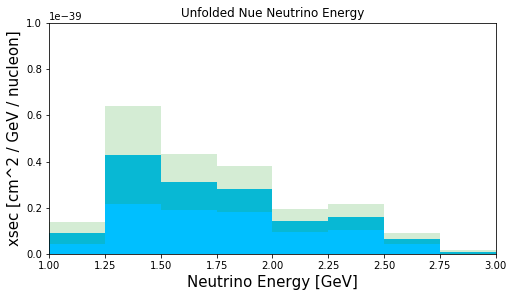

In [23]:
import random
import numpy
from matplotlib import pyplot

numu_fig = plt.figure(figsize=(8, 7))
numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
numu_ax1 = plt.subplot(numu_gs[0])
numu_ax1.set_xlim([1, 3])

bins = np.arange(1, 3.25, 0.25)
bincenters = np.arange(1.125, 3.125, 0.25)
bin_edges = np.arange(1, 3.25, 0.25)
bin_size = [(bin_edges[i + 1] - bin_edges[i]) / 2
            for i in range(len(bin_edges) - 1)]
count = np.arange(1.1, 3.1, 0.25)
weights = []
for i in range(len(count)):
    weight = count[i]*xsec_numu_events[i]
    weights.append(weight)

sel = numu_ax1.hist(count, bins, color='deepskyblue', weights=xsec_numu_events)
plt.ylim(0, 1E-39)
numu_ax1.set_xlabel('Neutrino Energy [GeV]', fontsize=15)
numu_ax1.set_ylabel('xsec [cm^2 / GeV / nucleon]', fontsize=15)
numu_ax1.set_title("Unfolded Nue Neutrino Energy")

lower_err = np.nan_to_num(xsec_numu_events-xsec_numu_errs)

numu_ax1.bar(bincenters, xsec_numu_errs*2,width=[n*2 for n in bin_size],facecolor='tab:green',alpha=0.2,bottom=(lower_err))

numu_fig.savefig("unfolded_MC_numu_"+ending+".svg",bbox_inches='tight' )

[ 0.92996737  1.28149536  2.669819    3.0348288   4.64718971  1.29807473
  3.43413424 59.40181147]
[ 0.92996737  1.28149536  2.669819    3.0348288   4.64718971  1.29807473
  3.43413424 59.40181147]


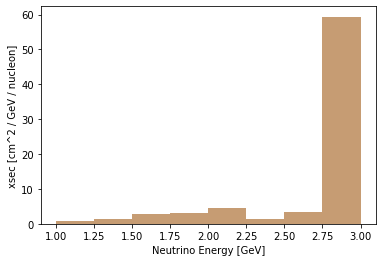

In [25]:
#Think need to replace 2nd bin due to unfolding

import random
import numpy
from matplotlib import pyplot

bins = np.arange(1, 3.25, 0.25)
count = np.arange(1.1, 3.1, 0.25)
#print(count)

#plt.ylim(0, 35)
plt.xlabel("Neutrino Energy [GeV]")
plt.ylabel("xsec [cm^2 / GeV / nucleon]")

print(xsec_nue_events/xsec_numu_events)
print(xsec_ratio_events)

pyplot.hist(count, bins, weights=np.nan_to_num(xsec_nue_events/xsec_numu_events), alpha=0.5)
pyplot.hist(count, bins, weights=xsec_ratio_events, alpha=0.5)

#pyplot.legend(loc='upper right')
pyplot.show()


[ 0.92996737  1.28149536  2.669819    3.0348288   4.64718971  1.29807473
  3.43413424 59.40181147]


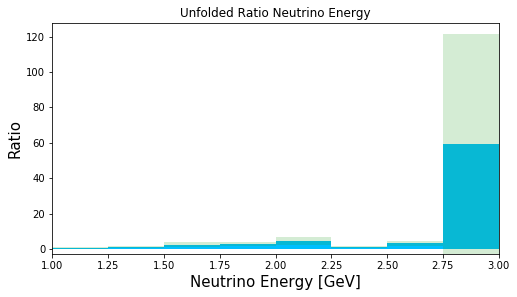

In [27]:
import random
import numpy
from matplotlib import pyplot


ratio_fig = plt.figure(figsize=(8, 7))
ratio_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
ratio_ax1 = plt.subplot(ratio_gs[0])
ratio_ax1.set_xlim([1, 3])

bins = np.arange(1, 3.25, 0.25)
bincenters = np.arange(1.125, 3.125, 0.25)
bin_edges = np.arange(1, 3.25, 0.25)
bin_size = [(bin_edges[i + 1] - bin_edges[i]) / 2
            for i in range(len(bin_edges) - 1)]

count = np.arange(1.1, 3.1, 0.25)
#print(len(count))
#weights = []
#for i in range(len(count)):
#    weight = count[i]*xsec_ratio_events[i]
#    weights.append(weight)


#test_weights = [(random.random()/random.random() - 0.75) for x in range(len(count))]
#print(count)
#xsec_ratio_events[7] = 0
#print(xsec_ratio_events)
print("")
sel = ratio_ax1.hist(count, bins, color='deepskyblue', weights=xsec_ratio_events)  # , weights=xsec_ratio_events
print(sel[0])

#plt.ylim(0, 8)
ratio_ax1.set_xlabel('Neutrino Energy [GeV]', fontsize=15)
ratio_ax1.set_ylabel('Ratio', fontsize=15)
ratio_ax1.set_title("Unfolded Ratio Neutrino Energy")

lower_err = np.nan_to_num(xsec_ratio_events-xsec_ratio_errs)

ratio_ax1.bar(bincenters, xsec_ratio_errs*2,width=[n*2 for n in bin_size],facecolor='tab:green',alpha=0.2,bottom=(lower_err))

ratio_fig.savefig("unfolded_MC_ratio_"+ending+".svg",bbox_inches='tight' )

In [28]:
nue_frac_err = xsec_nue_errs/xsec_nue_events
numu_frac_err = xsec_numu_errs/xsec_numu_events
ratio_frac_err = xsec_ratio_errs/xsec_ratio_events

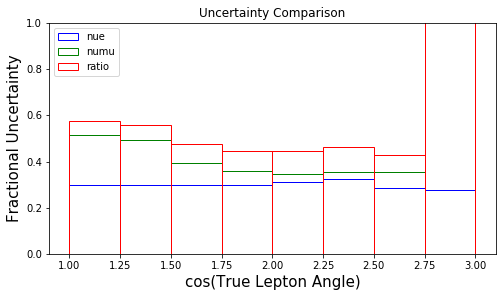

In [29]:
errors_fig = plt.figure(figsize=(8, 7))
errors_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
errors_ax1 = plt.subplot(ratio_gs[0])


bins = np.arange(1, 3.25, 0.25)
count = np.arange(1.1, 3.1, 0.25)
plt.ylim(0, 1)

sel_nue = errors_ax1.hist(count, bins, edgecolor='blue', facecolor='None', weights=nue_frac_err, label='nue')
sel_numu = errors_ax1.hist(count, bins, edgecolor='green', facecolor='None', weights=numu_frac_err, label='numu')
sel_ratio = errors_ax1.hist(count, bins, edgecolor='red', facecolor='None', weights=ratio_frac_err, label='ratio')
errors_ax1.set_ylabel('Fractional Uncertainty', fontsize=15)
errors_ax1.set_xlabel('cos(True Lepton Angle)', fontsize=15)
errors_ax1.set_title("Uncertainty Comparison")
leg = errors_ax1.legend()